## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Identify the targets (outputs, y values, labels, predictions) for the model.
is_successful

Identify the features (input values, x values, attributes model uses for predictions) for your model.
application_type, affiliation, use_case, income_amt, ask_amt

In [2]:
# Optimizing model, first try drop EIN, USE_CASE, STATUS, ORGANIZATION columns. I wanted to keep name, however, I got an error when training the model that my session crashed after using all available RAM
# Model 3: remove column special considerations
#  YOUR CODE GOES HERE
drop_columns = ['NAME', 'EIN', 'USE_CASE', 'STATUS', 'ORGANIZATION', 'SPECIAL_CONSIDERATIONS']
application_df.drop(drop_columns, axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
cutoff = 700
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = app_type_counts[app_type_counts < cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts_above1 = class_counts[class_counts > 1]
class_counts_above1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
# Model 3 change cutoff to 1000
#  YOUR CODE GOES HERE
cutoff = 1000
class_type_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = class_type_counts[class_type_counts < cutoff].index.tolist()

for cls in classifications_to_replace:
     application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
print(application_df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [9]:
#Take a look at new dataframe
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,0,5000,1
1,T3,Independent,C2000,1-9999,108590,1
2,T5,CompanySponsored,C3000,0,5000,0
3,T3,CompanySponsored,C2000,10000-24999,6692,1
4,T3,Independent,C1000,100000-499999,142590,1


In [10]:
# Convert categorical data to numeric with `pd.get_dummies` without using the NAME column/feature
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'INCOME_AMT'])
application_df.head(10)

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,CLASSIFICATION_Other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,108590,1,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,5000,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,6692,1,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,142590,1,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,5000,1,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,31452,1,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7,7508025,1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8,94389,1,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
9,5000,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [11]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df.drop(columns=['IS_SUCCESSFUL'])
y = application_df['IS_SUCCESSFUL']


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Model 2:Change the units in layer 1 from 8 to 16, increase the units in layer 2 to 10 from 5
# Model 3: Keep the same layers from model 2
# Model 4: increase units in layer 1 to 128 from 16, increase layer 2 from 5 to 64
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=128, input_dim=X_train.shape[1], activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               3968      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compared to the first model, I have more parameters 725 vs. 419 in the first model. Both models show non-trainable params at zero. Model 3 I did increase the cutoff for classification to 1000 and now my total params are 677

In [24]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model keep number of epochs at 50 for model2
# For model 3, I increase the epochs to 101
# Model 4: decrease the epochs to 10 since I'm now training 12,289
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5612 - accuracy: 0.7264
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5612 - accuracy: 0.7267
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5611 - accuracy: 0.7275
Epoch 4/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5606 - accuracy: 0.7279
Epoch 5/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5610 - accuracy: 0.7274
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5603 - accuracy: 0.7274
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5605 - accuracy: 0.7278
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5601 - accuracy: 0.7275
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5596 - accuracy: 0.7281
Epoch 10/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5601 - accuracy: 0.7279

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5640 - accuracy: 0.7291 - 598ms/epoch - 2ms/step
Loss: 0.5640454292297363, Accuracy: 0.7290962338447571


**On the second model, accuracy decreased & loss increased. The output from model2:**

*   268/268 - 1s - loss: 0.5635 - accuracy: 0.7270 - 889ms/epoch - 3ms/step
*   Loss: 0.5634859204292297, Accuracy: 0.7269970774650574
*   Change the units in layer 1 from 8 to 16, increase the units in layer 2 to 10 from 5
*   Epochs 50
  
**The output from model1 was:**

*   268/268 - 1s - loss: 0.5528 - accuracy: 0.7292 - 716ms/epoch - 3ms/step
*   Loss: 0.5528087615966797, Accuracy: 0.7292128205299377
*   Epochs 50

**The output from model3 was:**

*   268/268 - 1s - loss: 0.5635 - accuracy: 0.7270 - 889ms/epoch - 3ms/step
*   Loss: 0.5634859204292297, Accuracy: 0.7269970774650574
*   Epochs 101


PermutationExplainer explainer: 8576it [10:40, 13.39it/s]                          


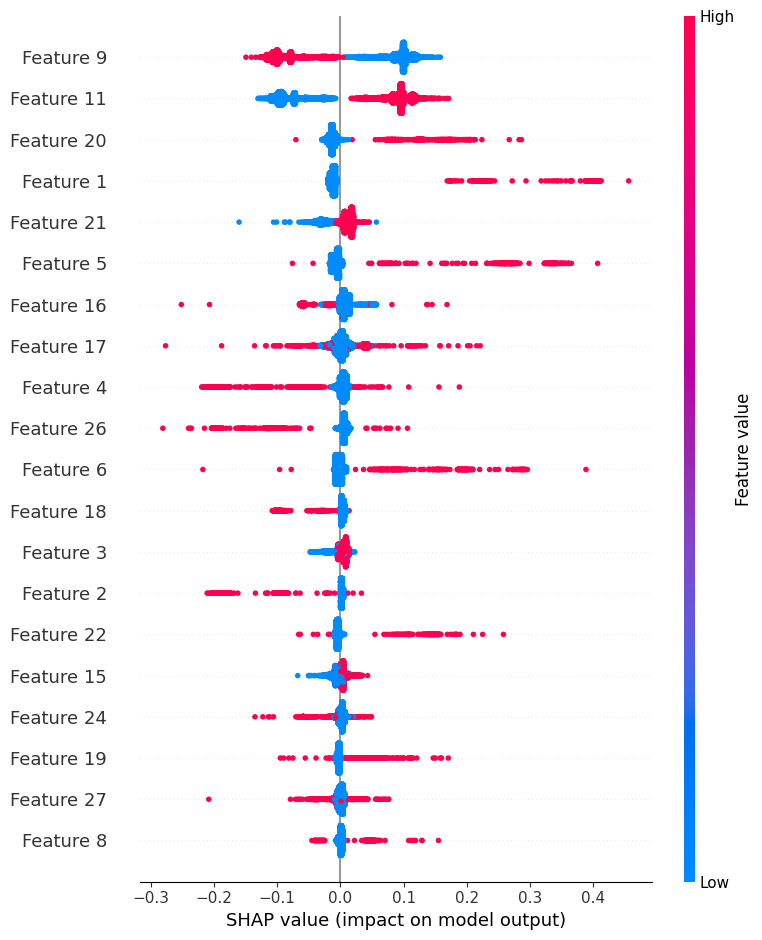

In [31]:
# Try SHAP to see where to improve model
#!pip install shap lime
import shap

# Initialize an explainer object with your model and training data
explainer = shap.Explainer(nn, X_train_scaled)

# Calculate SHAP values
shap_values = explainer(X_test_scaled)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

#evaluate model performance
y_pred = nn.predict(X_test_scaled)

268/268 [==============================] - 1s 2ms/step


In [17]:
#convert predictions to binary
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69      4037
           1       0.72      0.80      0.76      4538

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.72      8575



**In the classification report for model1:**
*  Accuracy is 73% which represents the percent of time the model accurately predicted the success of businesses funded by Alphabet Soup
*  Recall: 64% for 0, 81% for 1
*  Precision: 75% for 0, 72% for 1

**In the classification report for model2:**
*   Accuracy: 73%
*   Precision: 74% for 0, 72% for 1
*   Recall: 64% for 0, 80% for 1

**In the classification report for model3:**
Exactly the same as model 2

In [18]:
#calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7719825363732761


**For model1:**
The ROC-AUC Score of 0.78 means the model is performing relatively well (better than 50% which is pure guessing & close to 1.0 but at 0.78 still room to improve the model for better accuracy)

**For model2:**
The ROC-AUC Score decreased to 77.38%

**For model3:**
The ROC-AUC Score: 0.7719825363732761

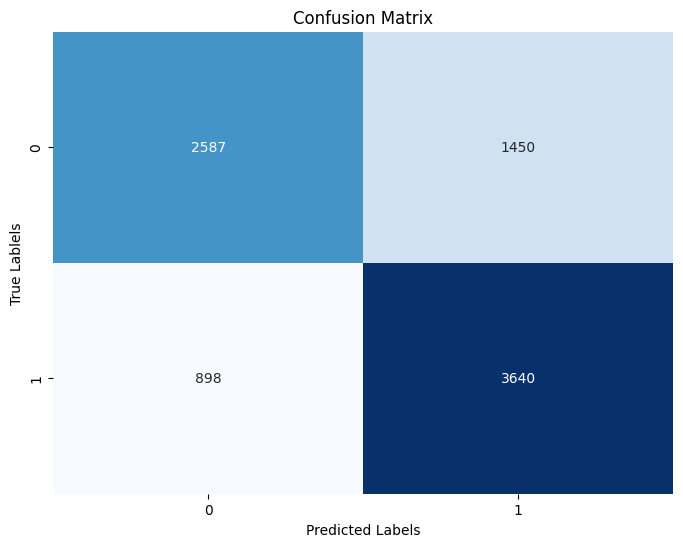

In [19]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Lablels")
plt.title("Confusion Matrix")
plt.show()

**In the confusion matrix for model1:**

* 1430 times where we predicted yes it was actually no.
*   3629 we predicted yes it was yes meaning our prediction was true and that would be the number of businesses that were successful after being funded by Alpahbet Soup.
*   909 times we predicted no, but the actual was yes
*   2607 the model predicted no, and the actual was no meaing that the businesses were predicted to not be successful with funding from Alphabet Soup and that was actually true

**In the confusion matrix for model2:**
* 1434 times where we predicted yes it was actually no.
*   3631 we predicted yes it was yes meaning our prediction and that would be the number of businesses that were successful after being funded by Alpahbet Soup.
*   907 times we predicted no, but the actual was yes
*   2603 the model predicted no, and the actual was no meaing that the businesses were predicted to not be successful with funding from Alphabet Soup and that was actually true

**In the confusion matrix for model3:**
The number of times the model predicted yes decreased to 3640





In [20]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
model_file_path = ("C:/Users/miesb/OneDrive/Desktop/deep_learning_challenge")
nn.save(model_file_path)
print("model saved to:", model_file_path)

model saved to: C:/Users/miesb/OneDrive/Desktop/deep_learning_challenge
